# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)
    self.fc1 = nn.Linear(in_features=16*6*6, out_features=120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # final output is 10
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x)) # flatten
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_feature(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    
    return num_features
  
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 데이터 생성 및 회귀식 설정

X.shape: torch.Size([100, 1])
y.shape: torch.Size([100, 1])


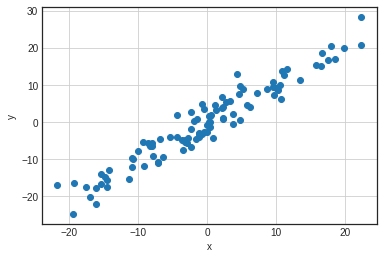

In [41]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

## 신경망 구성

In [42]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
  
    self.linear = nn.Linear(1, 1)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

## 모델 생성 및 파라미터 확인

In [43]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [44]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


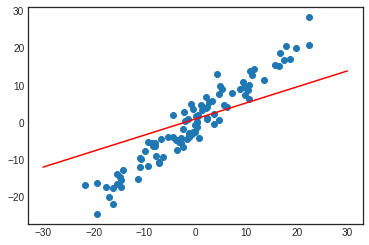

In [45]:
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item() # 파라미터 직접 접근 불가, item()함수를 통해서 가져와야함

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit("Initial Model") # 학습되기전 초창기 모델

## 손실함수와 옵티마이저

In [46]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [47]:
epochs = 100
losses = []

for epoch in range(epochs):
  '''
  한번의 학습이 완료되어지면(즉, Iteration이 한번 끝나면) gradients를 항상 0으로 만들어 주어야 합니다. 
  만약 gradients를 0으로 초기화해주지 않으면 gradient가 의도한 방향이랑 다른 방향을 가르켜 학습이 원하는 방향으로 이루어 지지 않습니다.
  '''
  optimizer.zero_grad() # "Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문" 사용
  
  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss)
  loss.backward() # backpropagation

  optimizer.step() # Optimizer update

  if epoch % 10 == 0:
    print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 44.3919
Epoch:  11	loss: 9.1550
Epoch:  21	loss: 8.7126
Epoch:  31	loss: 8.6847
Epoch:  41	loss: 8.6626
Epoch:  51	loss: 8.6415
Epoch:  61	loss: 8.6212
Epoch:  71	loss: 8.6017
Epoch:  81	loss: 8.5829
Epoch:  91	loss: 8.5649


## 시각화

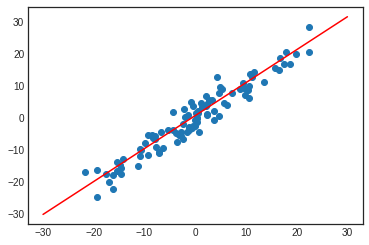

In [55]:
plot_fit("Trained Model")